In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import isoparse
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Set universal font sizes using rcParams
plt.rcParams['axes.labelsize'] = 20  # For x and y labels
plt.rcParams['xtick.labelsize'] = 20  # For x-ticks
plt.rcParams['ytick.labelsize'] = 20  # For y-ticks
plt.rcParams['legend.fontsize'] = 20  # For legend
plt.rcParams['axes.titlesize'] = 20

In [2]:
def construct_formatted_df(input_csv):
    formatted_df = pd.read_csv(input_csv, index_col=0)
    return formatted_df

In [3]:
def calculate_yearly_count(formatted_df):
    formatted_df['Timestamp'] = pd.to_datetime(formatted_df['Timestamp'], utc=True, format='%Y-%m-%dT%H:%M:%S%z')
    formatted_df['Year'] = formatted_df['Timestamp'].dt.year
    yearly_failures = formatted_df.groupby('Year').size().reset_index(name='number_of_failures')
    return yearly_failures

In [4]:
def calculate_monthly_variability(formatted_df):
    formatted_df['Timestamp'] = pd.to_datetime(formatted_df['Timestamp'], utc=True, format='%Y-%m-%dT%H:%M:%S%z')
    formatted_df['Month'] = formatted_df['Timestamp'].dt.month
    monthly_failures = formatted_df.groupby('Month').size().reset_index(name='number_of_failures')
    return monthly_failures

In [5]:
def calculate_weekly_patterns(formatted_df):
    formatted_df['Timestamp'] = pd.to_datetime(formatted_df['Timestamp'], utc=True, format='%Y-%m-%dT%H:%M:%S%z')
    formatted_df['Day'] = formatted_df['Timestamp'].dt.dayofweek
    daily_failures = formatted_df.groupby('Day').size().reset_index(name='number_of_failures')
    return daily_failures

In [6]:
def calculate_hourly_fluctuations(formatted_df):
    formatted_df['Timestamp'] = pd.to_datetime(formatted_df['Timestamp'], utc=True, format='%Y-%m-%dT%H:%M:%S%z')
    formatted_df['Hour'] = formatted_df['Timestamp'].dt.hour + 1
    hourly_failures = formatted_df.groupby('Hour').size().reset_index(name='number_of_failures')
    return hourly_failures

In [7]:
def generate_temporal_distributions_plot(alpine_monthly_failures, alpine_weekly_failures, 
                                         alpine_hourly_failures, camp_monthly_failures, 
                                         camp_weekly_failures, camp_hourly_failures):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
    
    axs[0,0].bar(alpine_monthly_failures['Month'], alpine_monthly_failures['number_of_failures'], color='coral')
    axs[0,0].set_title('(a) Monthly')
    axs[0,0].set_ylabel('# Failures')
    axs[0,0].set_xticks([3, 6, 9, 12])
    axs[0,0].set_yticks([0, 250, 500])
    axs[0,0].yaxis.set_tick_params(which='both',      
                left=True,        
                right=False,      
                labelleft=True)
    
    
    axs[0,1].bar(alpine_weekly_failures['Day'], alpine_weekly_failures['number_of_failures'], color='coral')
    axs[0,1].set_title('(b) Weekly')
    labels = ['M', 'T', 'W', 'T', 'F', 'S', 'S']
    axs[0,1].set_xticks(range(0, 7), labels) 
    ylables = ['0', '.5K', '1K', '1.5K']
    axs[0,1].set_yticks([0, 250, 500, 750])
    axs[0,1].yaxis.set_tick_params(which='both',      
                left=True,        
                right=False,       
                labelleft=True)
    
    
    axs[0,2].bar(alpine_hourly_failures['Hour'], alpine_hourly_failures['number_of_failures'], color='coral')
    axs[0,2].set_title('(c) Hourly')
    axs[0,2].set_xticks([1, 8, 16, 24])  # Force only these ticks


    axs[1,0].bar(camp_monthly_failures['Month'], camp_monthly_failures['number_of_failures'], color='yellowgreen')
    axs[1,0].set_title('(d) Monthly')
    axs[1,0].set_xlabel('Months')
    axs[1,0].set_ylabel('# Failures')
    axs[1,0].set_xticks([3, 6, 9, 12])
    axs[1,0].set_ylim(0, 400)
    axs[1,0].set_yticks([0, 200, 400])
    axs[1,0].yaxis.set_tick_params(which='both',     
                    left=True,        
                    right=False,       
                    labelleft=True)

    
    axs[1,1].bar(camp_weekly_failures['Day'], camp_weekly_failures['number_of_failures'], color='yellowgreen')
    axs[1,1].set_title('(e) Weekly')
    axs[1,1].set_xlabel('Days of the week')
    labels = ['M', 'T', 'W', 'T', 'F', 'S', 'S']
    axs[1,1].set_xticks(range(0, 7), labels) 
    axs[1,1].set_ylim(0, 400)
    axs[1,1].set_yticks([0, 200, 400])
    axs[1,1].yaxis.set_tick_params(which='both',      
                    left=True,        
                    right=False,       
                    labelleft=True)  
   

    axs[1,2].bar(camp_hourly_failures['Hour'], camp_hourly_failures['number_of_failures'], color='yellowgreen')
    axs[1,2].set_title('(f) Hourly')
    axs[1,2].set_xlabel('Hours of the day')
    axs[1,2].set_xticks([5, 10, 15, 20])   
    axs[1,2].set_xticks([1, 8, 16, 24]) 


    plt.tight_layout()
    plt.savefig("months_ornl.pdf", bbox_inches='tight')
    plt.show()

In [8]:
def print_calendar_sums(monthly_failures):
    # Sum every 3 months
    print("Quarterly sums:")
    for i in range(0, len(monthly_failures), 3):
        sum_quarter = monthly_failures['number_of_failures'][i:i+3].sum()
        print(f'Sum from Month {i+1} to {i+3}: {sum_quarter}')

    # Sum every 6 months
    print("\nHalf-yearly sums:")
    for i in range(0, len(monthly_failures), 6):
        sum_half_year = monthly_failures['number_of_failures'][i:i+6].sum()
        print(f'Sum from Month {i+1} to {i+6}: {sum_half_year}')

In [9]:
def main():
    #construct formatted df
    alpine_formatted_df= construct_formatted_df("../alpine_formatted_data.csv")
    camp_formatted_df = construct_formatted_df("../camp_formatted_data.csv")
    
    #calculate yearly count of failures
    alpine_yearly_failures = calculate_yearly_count(alpine_formatted_df)
    camp_yearly_failures = calculate_yearly_count(camp_formatted_df)
    
    #calculate monthly variability of failures
    alpine_monthly_failures = calculate_monthly_variability(alpine_formatted_df)
    camp_monthly_failures = calculate_monthly_variability(camp_formatted_df)
    
    #calculate weekly patterns of failures
    alpine_weekly_failures = calculate_weekly_patterns(alpine_formatted_df)
    camp_weekly_failures = calculate_weekly_patterns(camp_formatted_df)
    
    #calculate hourly fluctuations of failures
    alpine_hourly_failures = calculate_hourly_fluctuations(alpine_formatted_df)
    camp_hourly_failures = calculate_hourly_fluctuations(camp_formatted_df)
    
    #generate plots
    generate_temporal_distributions_plot(alpine_monthly_failures, alpine_weekly_failures, 
                                         alpine_hourly_failures, camp_monthly_failures, 
                                         camp_weekly_failures, camp_hourly_failures)
    
    #print important information
    print("*********** Alpine ***********")
    print_calendar_sums(alpine_monthly_failures)
    print("*********** Campaign ***********")
    print_calendar_sums(camp_monthly_failures)


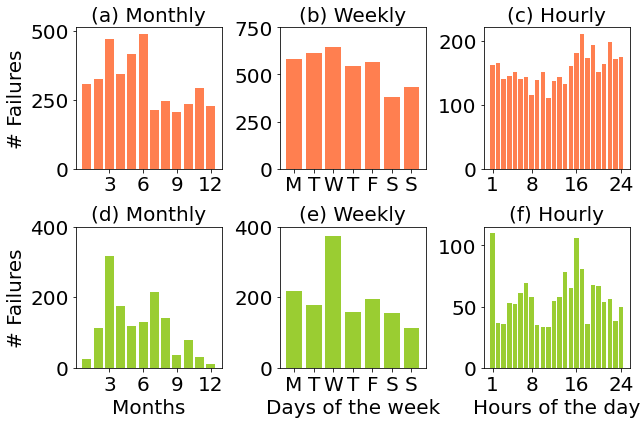

*********** Alpine ***********
Quarterly sums:
Sum from Month 1 to 3: 1103
Sum from Month 4 to 6: 1246
Sum from Month 7 to 9: 662
Sum from Month 10 to 12: 755

Half-yearly sums:
Sum from Month 1 to 6: 2349
Sum from Month 7 to 12: 1417
*********** Campaign ***********
Quarterly sums:
Sum from Month 1 to 3: 454
Sum from Month 4 to 6: 425
Sum from Month 7 to 9: 391
Sum from Month 10 to 12: 119

Half-yearly sums:
Sum from Month 1 to 6: 879
Sum from Month 7 to 12: 510


In [10]:
if __name__ == "__main__":
    main()